In [ ]:
import numpy as np

In [ ]:
# create err_x as a linspace from 0 to 2
err_x = np.linspace(0, 2, 100)

In [ ]:
reward = 1.0 - np.clip(err_x, 0, 2)*0.5
reward -= np.clip(np.log(err_x+1)*5, 0, 1)*0.1 # for 0.2
reward -= np.clip(np.log(err_x+1)*10, 0, 1)*0.1 # for 0.1
reward -= np.clip(np.log(err_x+1)*20, 0, 1)*0.1 # for 0.05
reward -= np.clip(np.log(err_x+1)*50, 0, 1)*0.1 # for 0.02

In [ ]:
# plot reward
import matplotlib.pyplot as plt
plt.plot(err_x, reward)
# add labels
plt.xlabel('err_x')
plt.ylabel('reward')

In [19]:
import torch
from icecream import ic

In [31]:
'''
create a function with is the output of a set of three-order polynomial function
the input dimension is input_dim 
the output dimension is output_dim
'''
input_dim = 4
output_dim = 2
seed = 0
# create a random matrix with shape (input_dim, output_dim)
# the values are from a uniform distribution between -1 and 1
torch.random.set_rng_state(torch.manual_seed(1024).get_state())
torch.manual_seed(seed)
# create a function
def f(x):
    matrix = torch.rand((3, input_dim, output_dim))*2-1
    # create a random vector with shape (output_dim)
    # the values are from a uniform distribution between -1 and 1
    vector = torch.rand((output_dim))*2-1
    # x is a vector with shape (input_dim)
    # the output is a vector with shape (output_dim)
    y = torch.matmul(x, matrix[0]) + torch.matmul(x**2, matrix[1]) + torch.matmul(x**3, matrix[2]) + vector
    return y/input_dim

In [32]:
# generate input signal as input_dim number of sin signal with different frequncy and phase 
input_signal = torch.zeros((100, input_dim))
for i in range(input_dim):
    input_signal[:,i] = torch.sin(torch.linspace(0, 2*np.pi, 100)*(i+1) + torch.rand(1)*np.pi)
output = f(input_signal)

Text(0, 0.5, 'output')

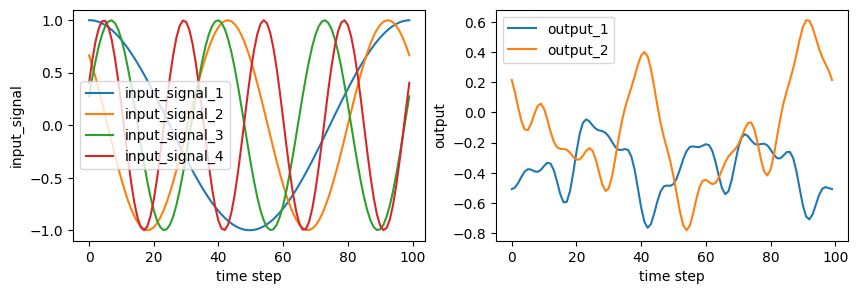

In [33]:
# plot input and output
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(input_signal.numpy())
plt.legend(['input_signal_1', 'input_signal_2', 'input_signal_3', 'input_signal_4'])
plt.xlabel('time step')
plt.ylabel('input_signal')
plt.subplot(1, 2, 2)
plt.plot(output.numpy())
plt.legend(['output_1', 'output_2'])
plt.xlabel('time step')
plt.ylabel('output')